# Medical Appointment No Shows Capstone

## 5. MODELING

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import os, sys
import warnings
warnings.filterwarnings('always') 
%matplotlib inline

In [76]:
#SKLEARN 

#PREPROCESSING 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder

#MODEL_SELECTION
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier

#LINEAR_MODEL
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge


#ENSEMBLE 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#SVM
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

#METRICS
from sklearn.metrics import r2_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix



#PIPELINE 
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline as mpl


from xgboost import XGBClassifier

In [37]:
#SCIPY
from scipy.stats import randint

## Load Data

In [39]:
path = 'data/df_ohe.csv'
df_ohe = pd.read_csv(path, index_col=None) 
df_ohe.sample(5)

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,WaitingDays,ScheduledDay_Y,ScheduledDay_M,...,Neighborhood_SANTOS REIS,Neighborhood_SEGURANÇA DO LAR,Neighborhood_SOLON BORGES,Neighborhood_SÃO BENEDITO,Neighborhood_SÃO CRISTÓVÃO,Neighborhood_SÃO JOSÉ,Neighborhood_SÃO PEDRO,Neighborhood_TABUAZEIRO,Neighborhood_UNIVERSITÁRIO,Neighborhood_VILA RUBIM
51336,29,0,0,0,0,0,1,26,2016,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50601,38,0,0,0,0,0,0,14,2016,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46208,58,0,0,0,0,0,0,3,2016,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9766,84,0,1,1,1,0,0,5,2016,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5614,6,0,0,0,0,0,0,13,2016,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
X = df_ohe.drop(['NoShow_Yes'], axis = 1)
y = df_ohe['NoShow_Yes']

SEED=1
TS = 0.2

# Create training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = TS, random_state=SEED, stratify=y)

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(88413, 94)
(88413,)
(22104, 94)
(22104,)


# 1. K-NEAREST NEIGHBORS
- Model That classifies data based on its distance to training set data. A new data point is assigned a label based on the class that the majority of surrounding data points belong to. 
- “The k-nearest neighbors algorithm (KNN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression”-Wikipedia

In [91]:
# KNN Object
knn = KNeighborsClassifier(n_neighbors=48, 
                           weights='uniform', algorithm='auto', 
                           leaf_size=30, p=2, metric='minkowski', 
                           metric_params=None, n_jobs=None) 




# Fit the classifier to the data
knn.fit(X_train,y_train)  

# Predict the labels for the training data X

y_pred = knn.predict(X_test)  


# Generate the confusion matrix and classification report
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n",classification_report(y_test,y_pred))

#Checking performance our model with ROC Score.
print("ROC Score:",roc_auc_score(y_test, y_pred))

knn_score = round(knn.score(X_train, y_train) * 100, 2)
print("KNN Score:", knn_score)

knn_test_score = round(knn.score(X_test, y_test) * 100, 2)
print("KNN Test Score:", knn_score)

Confusion Matrix 
 [[17521   120]
 [ 4374    89]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.80      0.99      0.89     17641
         1.0       0.43      0.02      0.04      4463

    accuracy                           0.80     22104
   macro avg       0.61      0.51      0.46     22104
weighted avg       0.72      0.80      0.72     22104

ROC Score: 0.5065697038767685
KNN Score: 79.96
KNN Test Score: 79.96


In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid,cv=5)
knn_cv.fit(X_train,y_train)
knn_cv.best_params_

In [34]:
knn_cv.best_score_

0.7953551500527825

# 2. Logistic Regression Model
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In [95]:
# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
#y = y.ravel()

# Create logistic regression
logreg = LogisticRegression(solver='lbfgs', max_iter=7600)

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_test_score = round(logreg.score(X_test, y_test) * 100, 2)

print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_test_score)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,y_pred))

[[17448   193]
 [ 4378    85]]
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88     17641
         1.0       0.31      0.02      0.04      4463

    accuracy                           0.79     22104
   macro avg       0.55      0.50      0.46     22104
weighted avg       0.70      0.79      0.71     22104

Logistic Regression Training Score: 
 79.47
Logistic Regression Test Score: 
 79.32
Intercept: 
 [-2.62561922e-06]
Accuracy: 
 0.793204849800941


In [47]:
# Compute 5-fold cross-validation scovres: cv_scores
#Will only work if max_iter is increased.
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5,scoring='accuracy').mean()
print(cv_scores*100)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

79.4792607532409
Average 5-Fold CV Score: 0.794792607532409


In [26]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(logreg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.793204849800941
Root Mean Squared Error: 0.4547473476547818


#### Plot ROC curve

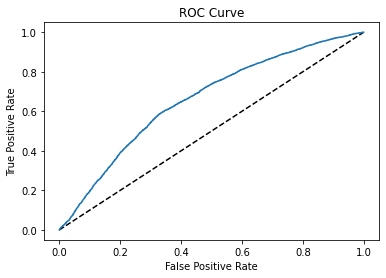

In [27]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr,tpr, thresholds = roc_curve(y_test,y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### AUC Computation for the Logistic Regression Model

In [28]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test,y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X,y,scoring='roc_auc', cv=5)

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.6586381957080789
AUC scores computed using 5-fold cross-validation: [0.64900483 0.65198619 0.63477394 0.63950717 0.66632473]


#### Hyperparameter tuning with GridSearchCV

In [29]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver='lbfgs', max_iter=2000, class_weight='balanced')

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid,cv=5)

# Fit it to the data
logreg_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.6829312321534745


#### Hyperparameter tuning with RandomizedSearchCV

In [17]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 6}
Best score is 0.7980944108791878


## 3. Gaussian Naive Bayes

In [101]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
y_pred= gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_test_score = round(gaussian.score(X_test, y_test) * 100, 2)

print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_test_score)
print('Accuracy: \n', accuracy_score(y_test,y_pred))

[[ 7250 10391]
 [ 1463  3000]]
              precision    recall  f1-score   support

         0.0       0.83      0.41      0.55     17641
         1.0       0.22      0.67      0.34      4463

    accuracy                           0.46     22104
   macro avg       0.53      0.54      0.44     22104
weighted avg       0.71      0.46      0.51     22104

Gaussian Score: 
 46.75
Gaussian Test Score: 
 46.37
Accuracy: 
 0.4637169743032935


# Boosting

### 4. AdaBoost Model

In [100]:
dt = DecisionTreeClassifier(max_depth=1,random_state=SEED)

adb = AdaBoostClassifier(base_estimator=dt,n_estimators=100)

adb.fit(X_train,y_train)

y_pred_proba = adb.predict_proba(X_test)[:,1]

adb_clf_roc_auc_score = roc_auc_score(y_test,y_pred_proba)

print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score ))

adb_score = round(adb.score(X_train, y_train) * 100, 2)
adb_test_score = round(adb.score(X_test, y_test) * 100, 2)

print('AdaBoost Training Score: \n', adb_score)
print('AdaBoost Test Score: \n', adb_test_score)

ROC AUC score: 0.73
AdaBoost Training Score: 
 79.74
AdaBoost Test Score: 
 79.7


### Gradient Boosting

In [85]:

# Instantiate gb
gb = GradientBoostingClassifier(max_depth=4, 
            n_estimators=300,
            random_state=1)

# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test,y_pred)

# Compute RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

print('Accuracy: \n', accuracy_score(y_test, y_pred))

Test set RMSE of gb: 0.446
Accuracy: 
 0.8006695620702136


### Stochastic Gradient Boosting
- Each Tree is trained on a random subset of rows of the training data.

In [88]:
sgbt = GradientBoostingClassifier(subsample=0.9,
                                  max_depth=4, 
                                  n_estimators=300,
                                  random_state=2)
sgbt.fit(X_train,y_train)
y_pred = sgbt.predict(X_test)

mse_test = MSE(y_test,y_pred)
# Compute RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))
print('Accuracy: \n', accuracy_score(y_test, y_pred))

Test set RMSE of gb: 0.446
Accuracy: 
 0.801076728193992


### XGBOOST

In [77]:

xg_cl = XGBClassifier(objective='binary:logistic',
                         n_estimators=10, seed=123)
xg_cl.fit(X_train,y_train)
y_pred = xg_cl.predict(X_test)

accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("Accuracy: %.2f" % (accuracy*100),"%")

Accuracy: 80.02 %


# Model Evaluation

In [106]:
models = pd.DataFrame({
    'Model': [ 
        'k-Nearest Neighbors',
        'Logistic Regression',
        'Gaussian Naive Bayes',
        'AdaBoost'
    ],
             
    
    'Score': [ 
        knn_score, 
        logreg_score,
        gauss_score,
        adb_score
    ],
    
    'Test Score': [ 
        knn_test_score,
        logreg_test_score,
        gauss_test_score,
        adb_test_score
    ]})


models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
3,AdaBoost,79.74,79.70
0,k-Nearest Neighbors,79.96,79.67
1,Logistic Regression,79.47,79.32
2,Gaussian Naive Bayes,46.75,46.37
